In [42]:
#import libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
data = pd.read_csv("Chennai.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                5014 non-null   int64 
 1   Area                 5014 non-null   int64 
 2   Location             5014 non-null   object
 3   No. of Bedrooms      5014 non-null   int64 
 4   Resale               5014 non-null   int64 
 5   MaintenanceStaff     5014 non-null   int64 
 6   Gymnasium            5014 non-null   int64 
 7   SwimmingPool         5014 non-null   int64 
 8   LandscapedGardens    5014 non-null   int64 
 9   JoggingTrack         5014 non-null   int64 
 10  RainWaterHarvesting  5014 non-null   int64 
 11  IndoorGames          5014 non-null   int64 
 12  ShoppingMall         5014 non-null   int64 
 13  Intercom             5014 non-null   int64 
 14  SportsFacility       5014 non-null   int64 
 15  ATM                  5014 non-null   int64 
 16  ClubHo

In [4]:
data.describe()

,Price,Area,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
count,5.014000e+03,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,...,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000,5014.000000
mean,8.731264e+06,1232.992022,2.362984,0.097128,5.000997,5.213602,5.160949,5.114878,5.123055,5.115277,...,5.264260,4.999402,5.068010,4.997208,4.991823,5.009174,5.011767,4.998404,4.991823,5.009174
std,1.034261e+07,641.841841,0.705252,0.296162,4.464256,4.239118,4.296954,4.346406,4.337706,4.345983,...,4.182092,4.465864,4.395648,4.468074,4.473489,4.455995,4.453369,4.466869,4.473489,4.455995
min,2.000000e+06,362.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.095000e+06,865.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.782000e+06,1067.000000,2.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
75%,8.675000e+06,1438.750000,3.000000,0.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
max,1.900000e+08,7240.000000,5.000000,1.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000


In [5]:
data.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator'],
      dtype='object')

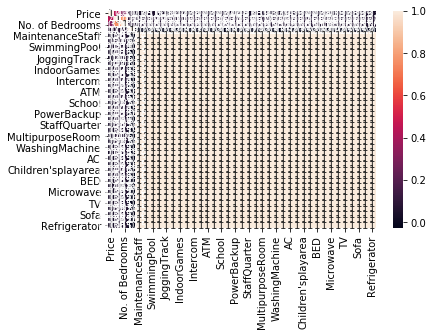

In [6]:
sns.heatmap(data.corr(), annot=True)

In [25]:
X = data[['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', "Children'splayarea", 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator']]

y = data['Price']

In [26]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=47)

In [62]:
X_train

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
3450,3500000,1465,Manapakkam,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
3853,4255000,1038,Ayanambakkam,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4676,22300000,1685,Padur,3,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
4033,12600000,612,Moolacheri,1,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
233,8205000,1563,Karapakkam,3,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3095,4829000,876,Selaiyur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
2896,3474000,738,Nanmangalam,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9
691,9741000,1584,Perungudi,3,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3336,10500000,850,Porur,2,0,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


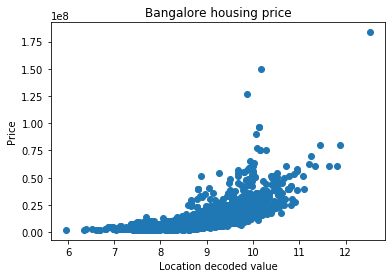

In [63]:
K=np.log(X_train['Price']/X_train['Area'])

plt.plot(K,X_train['Price'],'o')
plt.xlabel('Location decoded value')
plt.ylabel('Price')
plt.title('Bangalore housing price')
plt.show()


In [64]:
matrix_corr=X_train.corr()
matrix_corr['Price']

Price                  1.000000
Area                   0.419317
No. of Bedrooms        0.303560
Resale                 0.091496
MaintenanceStaff       0.052747
Gymnasium              0.063763
SwimmingPool           0.063166
LandscapedGardens      0.060994
JoggingTrack           0.054873
RainWaterHarvesting    0.055554
IndoorGames            0.056832
ShoppingMall           0.052591
Intercom               0.060870
SportsFacility         0.056424
ATM                    0.051148
ClubHouse              0.060837
School                 0.051561
24X7Security           0.057899
PowerBackup            0.061380
CarParking             0.055960
StaffQuarter           0.052703
Cafeteria              0.053710
MultipurposeRoom       0.054613
Hospital               0.051831
WashingMachine         0.053339
Gasconnection          0.054344
AC                     0.053011
Wifi                   0.051422
Children'splayarea     0.060690
LiftAvailable          0.056109
BED                    0.052695
VaastuCo

In [65]:
def na_remove(data):
    data.replace(9,0.5,inplace=True)

In [66]:
def data_processing(data):
    K=np.log(data['Price']/data['Area'])
    data['Location']=K
    house_feature=data.drop(['Price'],axis=1)
    my_pipeline=Pipeline([('rem',na_remove(house_feature)),
                          ('std',StandardScaler())   
                         ])
    return my_pipeline.fit_transform(house_feature)

In [67]:
houseprice_train=np.log(X_train['Price'])
data_train=data_processing(X_train)

C:\Users\Amit kumar mishra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
data_train.shape

(4011, 39)

# Different model training

In [69]:
model1=LinearRegression().fit(data_train,houseprice_train)

In [70]:
model2=Ridge().fit(data_train,houseprice_train)

In [71]:
model3=DecisionTreeRegressor().fit(data_train,houseprice_train)

In [72]:
model4=RandomForestRegressor().fit(data_train,houseprice_train)

In [73]:
model1_pred=model1.predict(data_train)
model2_pred=model2.predict(data_train)
model3_pred=model3.predict(data_train)
model4_pred=model4.predict(data_train)

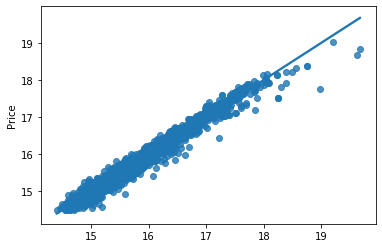

In [74]:
sns.regplot(model1_pred,houseprice_train)

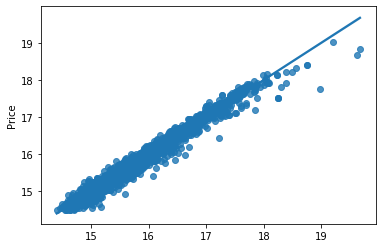

In [75]:
sns.regplot(model2_pred,houseprice_train)

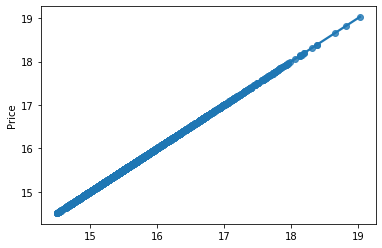

In [76]:
sns.regplot(model3_pred,houseprice_train)

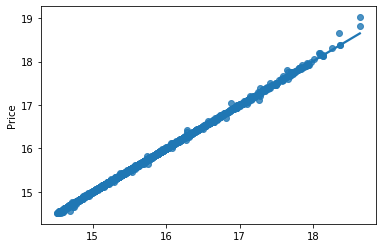

In [77]:
sns.regplot(model4_pred,houseprice_train)

# Testing

In [78]:
houseprice_test=X_test['Price']

In [79]:
data_test=data_processing(X_test)

C:\Users\Amit kumar mishra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [80]:
model1_test=np.exp(model1.predict(data_test))
model2_test=np.exp(model2.predict(data_test))
model3_test=np.exp(model3.predict(data_test))
model4_test=np.exp(model4.predict(data_test))

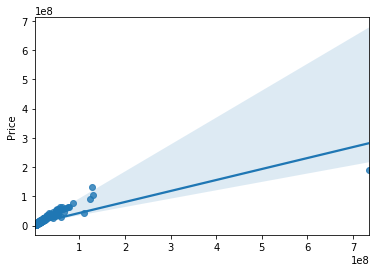

In [81]:
sns.regplot(model1_test,houseprice_test)

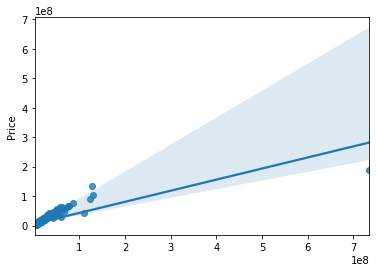

In [82]:
sns.regplot(model2_test,houseprice_test)

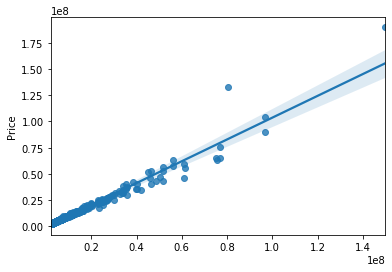

In [83]:
sns.regplot(model3_test,houseprice_test)

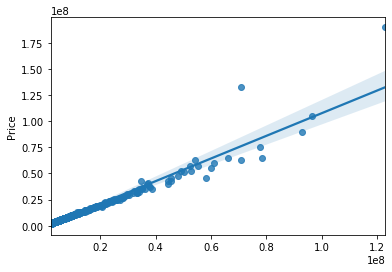

In [84]:
sns.regplot(model4_test,houseprice_test)

In [85]:
model1_r2=r2_score(model1_test,houseprice_test)

model2_r2=r2_score(model2_test,houseprice_test)

model3_r2=r2_score(model3_test,houseprice_test)

model4_r2=r2_score(model4_test,houseprice_test)

In [86]:
print("model1_error:{}\nmodel2_error:{}\nmodel3_error:{}\nmodel4_error:{}".format(model1_r2,model2_r2,model3_r2,model4_r2))

model1_error:0.5388426697874404
model2_error:0.5394073065736642
model3_error:0.9535721516541807
model4_error:0.919527661813921


# Model exporting

In [87]:
import joblib as jb

In [92]:
jb.dump(model4,'Chennai_house_price.pkl')

['Chennai_house_price.pkl']